# 7.09 Using Cloud Services

In this notebook you will:
- Connect to data hosted on Google Sheets
- Use Python to analyze this data

All in the cloud! ☁

## Step 1: connecting to data

Our data is already hosted on Google Sheets. First we need to authenticate and make sure your Google account has access to our data (and so does Colab):

In [1]:
from google.colab import auth
auth.authenticate_user()

Now we need to connect to Google Sheets. We will use the [gspread](https://github.com/burnash/gspread) library to access Google Sheet data.

In [2]:
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Let's connect to the spreadsheet using its url:

In [3]:
sheet_url = "https://docs.google.com/spreadsheets/d/1VCStrcsINV5hUEZegIP4S554Zf2nfzi1SAGKYrnSEGs/edit?usp=sharing"

worksheet = gc.open_by_url(sheet_url).sheet1

We can quite easily import this data into `pandas`. First, we get all the values from the data (as lists of lists):

In [4]:
all_values = worksheet.get_all_values()

# inspect a couple of lines
all_values[:3]

[['Timestamp',
  'Rate these pizza toppings [Pepperoni]',
  'Rate these pizza toppings [Mushrooms]',
  'Rate these pizza toppings [Pineapple]',
  'Rate these pizza toppings [Ham]',
  'Rate these pizza toppings [Spinach]',
  'Rate these pizza toppings [Olives]',
  'Rate these pizza toppings [Sweetcorn]',
  'Only one of these artists can keep producing music. Who do you choose?',
  'Would you rather fight...',
  'In miles, how long is the line that can you draw with an HB pencil before it runs out?',
  'When was Samuel L. Jackson born? No Googling, take a guess :-)'],
 ['02/08/2022 14:13:41',
  '4',
  '5 - Essential',
  '5 - Essential',
  '3 - Take it or leave it',
  '4',
  '5 - Essential',
  '2',
  'Stormzy',
  '100 horses that are the size of ducks',
  '3',
  '20/03/1970'],
 ['02/08/2022 14:14:46',
  '5 - Essential',
  '4',
  '2',
  '3 - Take it or leave it',
  '3 - Take it or leave it',
  '4',
  '1 - Terrible',
  'Foo Fighters',
  '100 horses that are the size of ducks',
  '5',
  '11/

## Step 2: Reading the data

Time to read this data into `pandas` and create a DataFrame:

In [6]:
# Convert to a DataFrame and render.
import pandas as pd

# extract header and data into two variables
column_names = all_values[0]
all_data = all_values[1:]

df = pd.DataFrame.from_records(data=all_data, columns=column_names)

df.head()

,Timestamp,Rate these pizza toppings [Pepperoni],Rate these pizza toppings [Mushrooms],Rate these pizza toppings [Pineapple],Rate these pizza toppings [Ham],Rate these pizza toppings [Spinach],Rate these pizza toppings [Olives],Rate these pizza toppings [Sweetcorn],Only one of these artists can keep producing music. Who do you choose?,Would you rather fight...,"In miles, how long is the line that can you draw with an HB pencil before it runs out?","When was Samuel L. Jackson born? No Googling, take a guess :-)"
0,02/08/2022 14:13:41,4,5 - Essential,5 - Essential,3 - Take it or leave it,4,5 - Essential,2,Stormzy,100 horses that are the size of ducks,3,20/03/1970
1,02/08/2022 14:14:46,5 - Essential,4,2,3 - Take it or leave it,3 - Take it or leave it,4,1 - Terrible,Foo Fighters,100 horses that are the size of ducks,5,11/06/1959
2,02/08/2022 14:14:47,5 - Essential,3 - Take it or leave it,1 - Terrible,3 - Take it or leave it,3 - Take it or leave it,2,1 - Terrible,Ed Sheeran,1 duck that's the size of a horse,20,06/05/1970
3,02/08/2022 14:14:48,4,4,4,4,3 - Take it or leave it,4,2,Ed Sheeran,100 horses that are the size of ducks,1000,12/10/1956
4,02/08/2022 14:14:52,5 - Essential,1 - Terrible,3 - Take it or leave it,5 - Essential,3 - Take it or leave it,2,1 - Terrible,Lady Gaga,100 horses that are the size of ducks,3,04/08/1955


# <font color="red">Exercise</font>

Now it's time to do some analysis and create some plots, all in your browser and all code running in the cloud!

## 1. Basic statistics

How many rows and columns are in the data? What does each row/column represent? How many responses do we have in total?

In [8]:
df.shape

(7, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Timestamp                                                                               7 non-null      object
 1   Rate these pizza toppings [Pepperoni]                                                   7 non-null      object
 2   Rate these pizza toppings [Mushrooms]                                                   7 non-null      object
 3   Rate these pizza toppings [Pineapple]                                                   7 non-null      object
 4   Rate these pizza toppings [Ham]                                                         7 non-null      object
 5   Rate these pizza toppings [Spinach]                                               

In [10]:
len(df)

7

## 2. What is the most popular pizza topping?

You will need to think about the format of the data in order to answer the question.

Also, make sure you extract the **numeric** component of the relevant columns , and that they have the correct data type.

In [15]:
df.describe()

,Timestamp,Rate these pizza toppings [Pepperoni],Rate these pizza toppings [Mushrooms],Rate these pizza toppings [Pineapple],Rate these pizza toppings [Ham],Rate these pizza toppings [Spinach],Rate these pizza toppings [Olives],Rate these pizza toppings [Sweetcorn],Only one of these artists can keep producing music. Who do you choose?,Would you rather fight...,"In miles, how long is the line that can you draw with an HB pencil before it runs out?","When was Samuel L. Jackson born? No Googling, take a guess :-)"
count,7,7,7,7,7,7,7,7,7,7,7,7
unique,7,3,4,5,4,3,4,3,4,2,6,7
top,02/08/2022 14:13:41,5 - Essential,4,5 - Essential,3 - Take it or leave it,3 - Take it or leave it,5 - Essential,1 - Terrible,Ed Sheeran,100 horses that are the size of ducks,3,20/03/1970
freq,1,4,2,2,3,4,2,3,3,5,2,1


In [16]:
df.dtypes

Timestamp                                                                                 object
Rate these pizza toppings [Pepperoni]                                                     object
Rate these pizza toppings [Mushrooms]                                                     object
Rate these pizza toppings [Pineapple]                                                     object
Rate these pizza toppings [Ham]                                                           object
Rate these pizza toppings [Spinach]                                                       object
Rate these pizza toppings [Olives]                                                        object
Rate these pizza toppings [Sweetcorn]                                                     object
Only one of these artists can keep producing music. Who do you choose?                    object
Would you rather fight...                                                                 object
In miles, how long is the line

In [18]:
df.columns

Index(['Timestamp', 'Rate these pizza toppings [Pepperoni]',
       'Rate these pizza toppings [Mushrooms]',
       'Rate these pizza toppings [Pineapple]',
       'Rate these pizza toppings [Ham]',
       'Rate these pizza toppings [Spinach]',
       'Rate these pizza toppings [Olives]',
       'Rate these pizza toppings [Sweetcorn]',
       'Only one of these artists can keep producing music. Who do you choose?',
       'Would you rather fight...',
       'In miles, how long is the line that can you draw with an HB pencil before it runs out?',
       'When was Samuel L. Jackson born? No Googling, take a guess :-)'],
      dtype='object')

In [22]:
pizza_col=[]
for column in df.columns:
  if "pizza" in column:
    pizza_col.append(column)
print(pizza_col)


['Rate these pizza toppings [Pepperoni]', 'Rate these pizza toppings [Mushrooms]', 'Rate these pizza toppings [Pineapple]', 'Rate these pizza toppings [Ham]', 'Rate these pizza toppings [Spinach]', 'Rate these pizza toppings [Olives]', 'Rate these pizza toppings [Sweetcorn]']


In [30]:
pizza_col

['Rate these pizza toppings [Pepperoni]',
 'Rate these pizza toppings [Mushrooms]',
 'Rate these pizza toppings [Pineapple]',
 'Rate these pizza toppings [Ham]',
 'Rate these pizza toppings [Spinach]',
 'Rate these pizza toppings [Olives]',
 'Rate these pizza toppings [Sweetcorn]']

In [63]:
for column in pizza_col:
    df[column] = df[column].astype(int)
    # print(df[column])

In [36]:
for column in pizza_col:
    df[column] = df[column].str[0].astype(int)
    print(df[column])

0    4
1    5
2    5
3    4
4    5
5    3
6    5
Name: Rate these pizza toppings [Pepperoni], dtype: int64
0    5
1    4
2    3
3    4
4    1
5    3
6    1
Name: Rate these pizza toppings [Mushrooms], dtype: int64
0    5
1    2
2    1
3    4
4    3
5    5
6    1
Name: Rate these pizza toppings [Pineapple], dtype: int64
0    3
1    3
2    3
3    4
4    5
5    1
6    4
Name: Rate these pizza toppings [Ham], dtype: int64
0    4
1    3
2    3
3    3
4    3
5    5
6    4
Name: Rate these pizza toppings [Spinach], dtype: int64
0    5
1    4
2    2
3    4
4    2
5    5
6    1
Name: Rate these pizza toppings [Olives], dtype: int64
0    2
1    1
2    1
3    2
4    1
5    5
6    5
Name: Rate these pizza toppings [Sweetcorn], dtype: int64


In [39]:
df[pizza_col]

,Rate these pizza toppings [Pepperoni],Rate these pizza toppings [Mushrooms],Rate these pizza toppings [Pineapple],Rate these pizza toppings [Ham],Rate these pizza toppings [Spinach],Rate these pizza toppings [Olives],Rate these pizza toppings [Sweetcorn]
0,4,5,5,3,4,5,2
1,5,4,2,3,3,4,1
2,5,3,1,3,3,2,1
3,4,4,4,4,3,4,2
4,5,1,3,5,3,2,1
5,3,3,5,1,5,5,5
6,5,1,1,4,4,1,5


In [64]:
type('Rate these pizza toppings [Sweetcorn]')

str

## 3. Plot a bar chart to show which musician got the most votes for question 2.

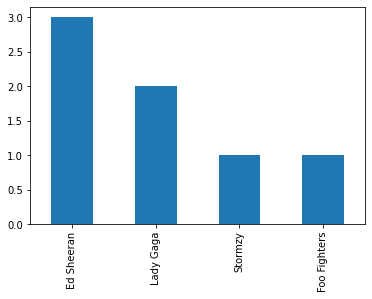

In [42]:
df['Only one of these artists can keep producing music. Who do you choose?'].value_counts().plot(kind='bar')

## 4. Would people rather fight small horses or giant ducks?

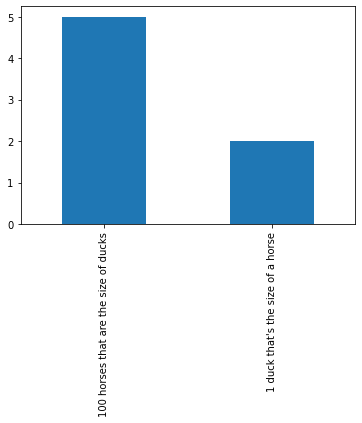

In [49]:
df['Would you rather fight...'].value_counts().plot(kind='bar')

## 5. Plot a histogram of answers for the question about the HB pencil (question 4).

The correct answer is **35 miles** - how do the guesses compare?

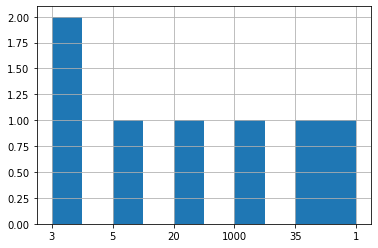

In [66]:
df['In miles, how long is the line that can you draw with an HB pencil before it runs out?'].hist()

## 6. Samuel L. Jackson's was born on the 21st December, 1948. What was the closest guess?

In [58]:
df[df["When was Samuel L. Jackson born? No Googling, take a guess :-)"] == '21/12/1948']

,Timestamp,Rate these pizza toppings [Pepperoni],Rate these pizza toppings [Mushrooms],Rate these pizza toppings [Pineapple],Rate these pizza toppings [Ham],Rate these pizza toppings [Spinach],Rate these pizza toppings [Olives],Rate these pizza toppings [Sweetcorn],Only one of these artists can keep producing music. Who do you choose?,Would you rather fight...,"In miles, how long is the line that can you draw with an HB pencil before it runs out?","When was Samuel L. Jackson born? No Googling, take a guess :-)"
5,02/08/2022 14:15:42,3,3,5,1,5,5,5,Lady Gaga,100 horses that are the size of ducks,35,21/12/1948
